# **Redes Neuronales Convolucionales**

Las redes neuronales comunes (capas densas) funcionan muy bien a la hora de ser entrenadas con caracteristicas, sin embargo, en el caso particular de detectar imagenes y ser capaz de diferenciar los objetos, se quedan bastante cortas, para eso exiten las redes convolucionales.

**Recuerda cambiar tu entorno de ejecucion, esta vez lo necesitaras mas**

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
# Cargar el dataset de Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes para que estén en el rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Cambiar la forma para que tengan canales (28x28x1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")


Forma de X_train: (60000, 28, 28, 1)
Forma de y_train: (60000, 10)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de imágenes con aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotar las imágenes hasta 20 grados
    width_shift_range=0.2,  # Desplazamiento horizontal
    height_shift_range=0.2, # Desplazamiento vertical
    shear_range=0.2,        # Cizalladura
    zoom_range=0.2,         # Zoom
    horizontal_flip=True,   # Invertir horizontalmente
    fill_mode='nearest'     # Estrategia de relleno
)

# Aplicar el aumento de datos a las imágenes de entrenamiento
datagen.fit(X_train)

In [16]:
model = models.Sequential()

# Primera capa convolucional con 32 filtros, seguida de una capa de pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())  # Acelera el entrenamiento y mejora la estabilidad
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional con 64 filtros, seguida de una capa de pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional con 128 filtros, seguida de una capa de pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Aplanar la salida para la capa totalmente conectada
model.add(layers.Flatten())

# Capa densa con 128 unidades y Dropout para prevenir sobreajuste
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Capa de salida con 10 unidades para clasificación (Softmax para multiclase)
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ver la arquitectura de la red
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

Como podemos ver, las redes convolucionales tienen una cantidad muy alta de parametros, ademas de que los datos de entrada son de gran tamaño (por ser imagenes analizadas por pixel), por lo tanto requieren de mas potencia computacional y tiempo para ser entrenados.

In [17]:
# Entrenar el modelo con Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6,  restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6)
data_generator = datagen.flow(X_train, y_train, batch_size=32)

history = model.fit(data_generator, epochs=60, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.4301 - loss: 1.7069 - val_accuracy: 0.7319 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6445 - loss: 0.9593 - val_accuracy: 0.7474 - val_loss: 0.6514 - learning_rate: 0.0010
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.6839 - loss: 0.8614 - val_accuracy: 0.7437 - val_loss: 0.6795 - learning_rate: 0.0010
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7006 - loss: 0.8169 - val_accuracy: 0.7325 - val_loss: 0.7503 - learning_rate: 0.0010
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7204 - loss: 0.7725 - val_accuracy: 0.7596 - val_loss: 0.6288 - learning_rate: 0.0010
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7231 - loss: 0.7648 - val_accuracy: 0.7868 - val_loss: 0.5650 - learning_rate: 0.0010
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7372 

In [18]:
# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de test: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8297 - loss: 0.4696
Precisión en el conjunto de test: 82.59%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


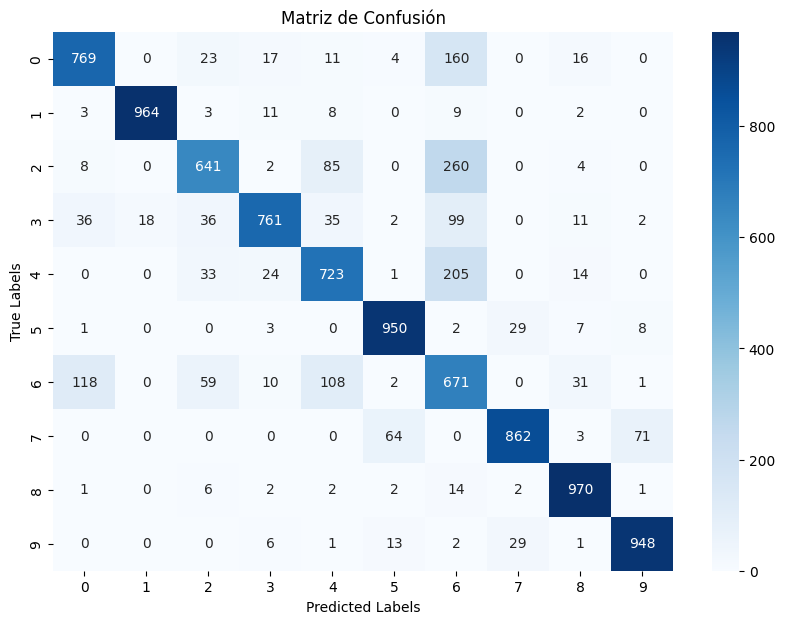

In [19]:
# Matriz de confusion del modelo

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Hacer predicciones
y_pred = model.predict(X_test)

# Necesitamos convertir las predicciones al índice de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir etiquetas verdaderas al formato adecuado si no lo están
y_true = np.argmax(y_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()


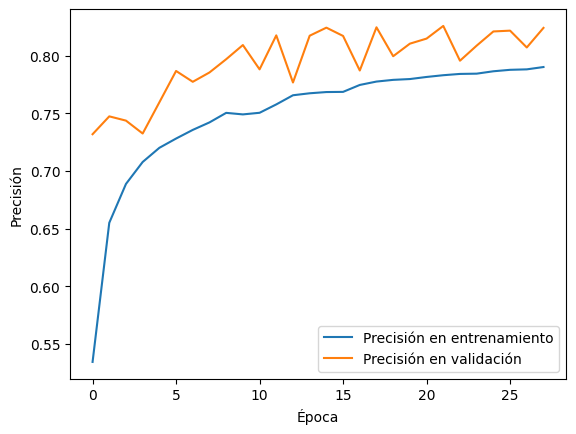

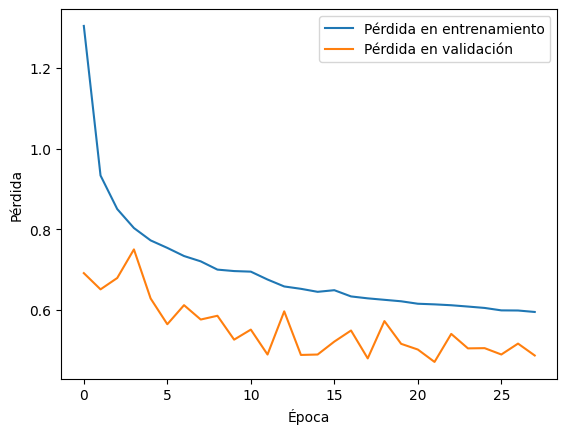

In [20]:
# Graficar la precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [21]:
# Guardar el modelo
model.save('fashion_mnist_cnn.h5')